In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

canes_data = pd.read_csv('canesdata.csv')
canes_old_data=pd.read_csv('Canesold.csv') #additional few days of data from old version of scrapy script

In [139]:
canes_data.iloc[[0, -1]]

,Raw data dump,Date,Time,Prize,DATEVALUE,TIMEVALUE,Time since last win (TIMEVALUE),Time since last win (sec),Time since last win (mm:ss)
0,"2017-02-07T02:32:30.218750,T-Shirt",2017-02-07,02:32:30.218750,T-Shirt,42773,0.105905,-,-,-
366,"2017-02-09T10:49:22.961375,Lemonade Card",2017-02-09,10:49:22.961375,Lemonade Card,42775,0.450960,0.002024838704,175,0:02:55


In [140]:
canes_data.groupby('Prize')['Prize'].count()

Prize
$35 Gift Basket       6
$50 Gift Basket       3
Beverage Holder      34
Box BOG Card        128
Cane's Cap           22
Carry All Cooler      6
Lemonade Card       106
Party Cooler          2
Plush Puppy           3
T-Shirt              56
Yeti Tumbler          1
Name: Prize, dtype: int64

In [141]:
canes_data['hour']=pd.to_datetime(canes_data['Time'], format='%H:%M:%S.%f').dt.hour
canes_data['Time']=pd.to_datetime(canes_data['Time'], format='%H:%M:%S.%f').dt.time

Text(0.5, 1.0, 'Number of prizes won by hour')

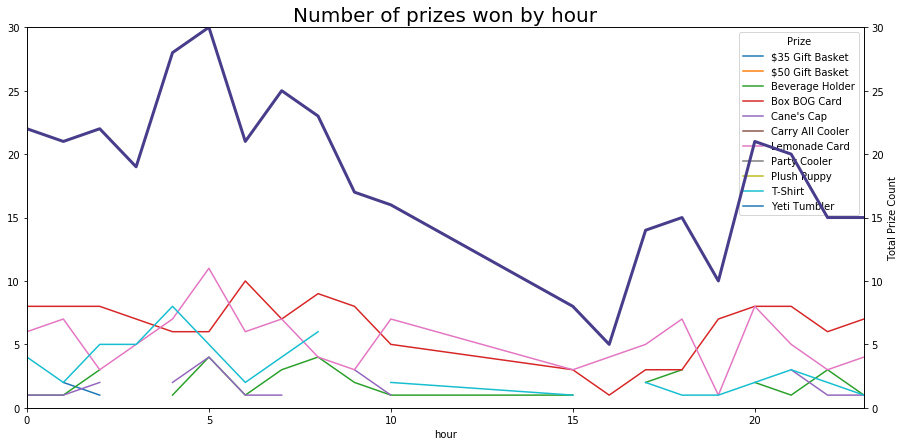

In [142]:
fig, ax = plt.subplots(figsize=(15,7))
canes_data.groupby(['hour','Prize'])['Prize'].count().unstack().plot(ax=ax)
canes_data.groupby('hour')['hour'].count().plot(ax=ax,secondary_y=True, label='Total Prize Count', color = "darkslateblue", lw=3)
ax.right_ax.set_ylabel('Total Prize Count')
ax.set_ylim(0,30)
ax.right_ax.set_ylim(0,30)
ax.set_title('Number of prizes won by hour', fontsize=20)

We saw an odd dip in total prizes won starting around 11am compared to earlier in the day. This was surprising at first, but we realized we had a gap in the latest data from when the scrapy script ran into an issue

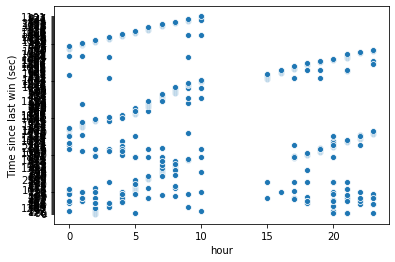

In [143]:
ax = sns.scatterplot(x='hour', y='Time since last win (sec)', data=canes_data)

In [144]:
#bringing in some datapoints from an older version of the script
canes_old_data.head()

,Time Stamp,Right 15 of Col A,Left 8 of Col B,Value of Time,Time (24 Hrs),Time to next win,Time to next win (minutes)
0,2017-02-02T23:03:09.791599,23:03:09.791599,23:03:09,0.960521,23.052500,0.005486,07:54.0
1,2017-02-02T23:11:03.816416,23:11:03.816416,23:11:03,0.966007,23.184167,0.005625,08:06.0
2,2017-02-02T23:19:09.607669,23:19:09.607669,23:19:09,0.971632,23.319167,0.004213,06:04.0
3,2017-02-02T23:25:13.064849,23:25:13.064849,23:25:13,0.975845,23.420278,0.015440,22:14.0
4,2017-02-02T23:47:27.026598,23:47:27.026598,23:47:27,0.991285,23.790833,0.002523,03:38.0


In [145]:
#'time to next win' can become 'time since last win' since there's no information on prizes
canes_old_data['Time since last win (sec)']=canes_old_data['Time to next win'].mul(86400)

In [146]:
canes_old_data=canes_old_data.rename(columns={'Right 15 of Col A':'Time'})


In [147]:
canes_old_data['hour']=pd.to_datetime(canes_old_data['Time'], format='%H:%M:%S.%f').dt.hour
canes_old_data['Time']=pd.to_datetime(canes_old_data['Time'], format='%H:%M:%S.%f').dt.time

In [151]:
canes_combined=pd.concat([canes_data[['Time','Time since last win (sec)','hour']],canes_old_data[['Time','Time since last win (sec)','hour']]], axis=0)

In [166]:
canes_combined=canes_combined.drop(canes_combined.index[[0,1]]) #drop bad values

In [167]:
canes_combined.head()

,Time,Time since last win (sec),hour
2,02:34:06.124794,96,2
3,02:36:13.886834,128,2
4,02:41:06.202289,292,2
5,02:44:22.897819,197,2
6,02:54:05.356796,582,2


In [173]:
canes_combined['Time since last win (sec)']=pd.to_numeric(canes_combined['Time since last win (sec)'])

In [180]:
canes_combined = canes_combined[canes_combined['Time since last win (sec)'] < 10000]  #remove outliers

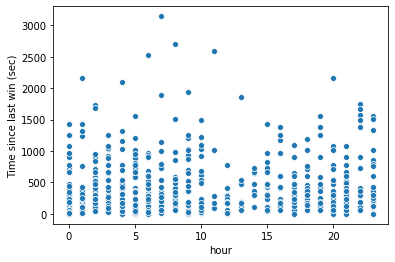

In [181]:
ax = sns.scatterplot(x='hour', y='Time since last win (sec)', data=canes_combined)

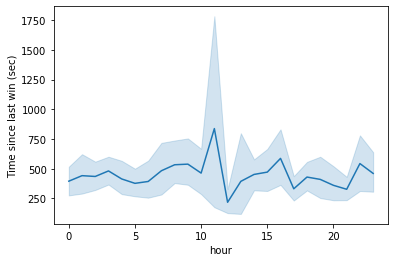

In [182]:
ax = sns.lineplot(x='hour', y='Time since last win (sec)', data=canes_combined)

Looking at the combined dataset, while there did seem to still be an irregualirty at opening time, it seemed like timing between prize releases were relatively consistent

In [185]:
canes_combined['Time since last win (sec)'].describe()

count     608.000000
mean      432.077303
std       444.846736
min         0.000000
25%       122.000000
50%       292.500000
75%       594.000000
max      3145.000000
Name: Time since last win (sec), dtype: float64

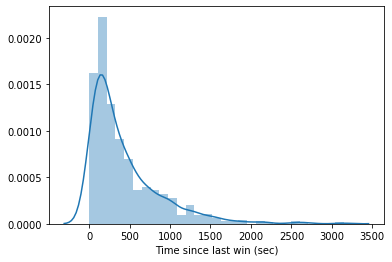

In [186]:
sns.distplot(canes_combined['Time since last win (sec)']);

Prize releases seem to be a pretty skewed distribution. While the majority of prizes were won in quick succession, several prizes were not released until much later. not sure if this was due to a lack of people entering the lottery, or if prizes were actually not made available. One possibility is that better prizes have a larger waiting/cooldown period before release. 

In [197]:
canes_data=canes_data.drop(canes_data.index[[0,1]]) #data clean up

In [200]:
canes_data['Time since last win (sec)']=pd.to_numeric(canes_data['Time since last win (sec)'])

In [222]:
counts=canes_data.groupby('Prize')['Time since last win (sec)'].count()

Text(0, 0.5, 'Time since last win (sec)')

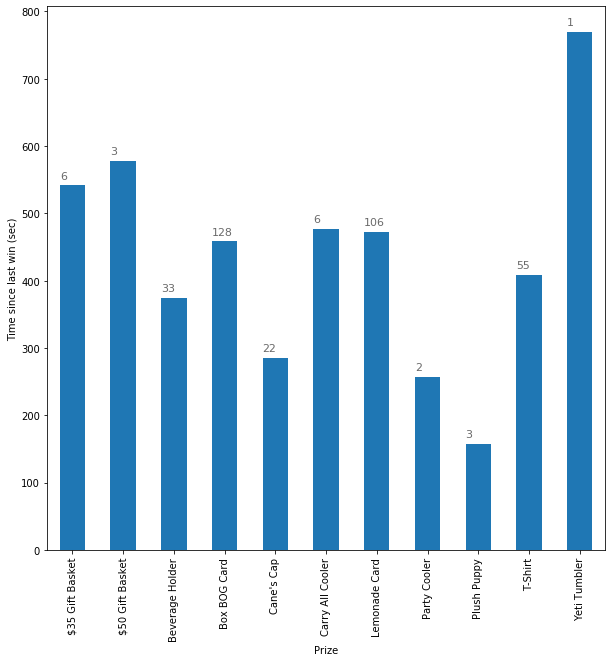

In [275]:
ax=canes_data.groupby('Prize')['Time since last win (sec)'].mean().plot.bar(figsize=(10,10))
for i,j in zip(ax.patches, range(len(ax.patches))):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(),i.get_height()+10,counts[j], fontsize=11,
                color='dimgrey')
ax.set_ylabel("Time since last win (sec)")
#chart annotations are total prizes of that type won

the investigation led to mixed results. Some less desired items(plush, cap, bevarage holder) appeared soon after the last prize was released, while the $50 gift basket had a higher cool down period. However, the Party Cooler, which seemed like a cool prize, had a low cooldown period despite being rare.